<a href="https://colab.research.google.com/github/justynamatejkowska/wizualizacja_py/blob/main/Wizualizacja_py_Matejkowska_Lewandowska.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projekt zaliczeniowy
## **Wizualizacja danych sprzedażowych sieci sklepów *Drogeria* w języku Python tekst**
##### Autorzy: Katarzyna Lewandowska, Justyna Matejkowska

# Przygotowanie środowiska

Import pakietów

In [21]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

Wczytanie danych

In [22]:
# przykladowy sposb odczytu z pliku lezacego pod sciezka /2021-selected-rates.csv
url = 'https://raw.githubusercontent.com/justynamatejkowska/wizualizacja_py/main/d_shops.csv'
response = requests.get(url)
open("/d_shops.csv", "wb").write(response.content)

991849

Wczytanie tabeli z danych

In [23]:
shops = pd.read_csv('/d_shops.csv')
shops.head()

,sklep_id,dzien_tyg,data,sprzedaz,liczba_klientow,czy_otwarty,czy_promocja,czy_swieto,czy_swieto_szkolne,sklep_typ,sklep_asort,sklep_konkurencja
0,1,3,31.12.2021,2605,327,Tak,Nie,Nie,Tak,c,Podstawowy,1270
1,2,3,31.12.2021,2269,252,Tak,Nie,Nie,Tak,a,Podstawowy,570
2,3,3,31.12.2021,3804,408,Tak,Nie,Nie,Tak,a,Podstawowy,14130
3,4,3,31.12.2021,10152,1311,Tak,Nie,Nie,Tak,c,Rozszerzony,620
4,5,3,31.12.2021,1830,217,Tak,Nie,Nie,Tak,a,Podstawowy,29910


Deklaracja kolorów

In [24]:
COLOR_1 = '#a1c9f4' 
COLOR_2 = '#8de5a1' 
COLOR_3 = '#ff9f9b'
COLOR_4 = '#d0bbff'
COLOR_5 = '#debb9b'
COLOR_6 = '#fab0e4'
COLOR_7 = '#cfcfcf'
COLOR_8 = '#fffea3'
COLOR_9 = '#b9f2f0'

# *Drogeria* vs konkurencja


Przygotowanie danych do wykresu 1. - tabela przestawna, suma sprzedaży 5 najbardziej dochodowych *Drogerii* oraz konkurencji

In [25]:
shops
values = ['sprzedaz','liczba_klientow','sklep_konkurencja']
top_5 = shops.pivot_table(index = 'sklep_id', values = values, aggfunc='sum').nlargest(5,'sprzedaz')

top_5

,liczba_klientow,sklep_konkurencja,sprzedaz
sklep_id,,,
42,337339,105850,3132357
25,419902,156950,3004443
4,405758,226300,2971989
35,222661,2795900,2946316
27,325933,21900,2891329


Wykres 1. - porównanie 5 sklepów *Drogeria*, które charakteryzują się się największą dochodowością wśród wszystkich sklepów *Drogeria*

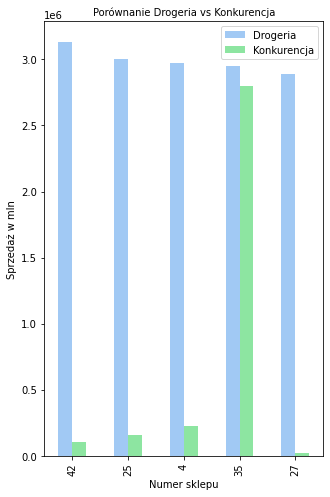

In [26]:
plt.rcParams["figure.figsize"] = (5,8) #zmiana rozmiaru
color=[COLOR_1, COLOR_2 ]

y=['sprzedaz','sklep_konkurencja']
fig1 = top_5.plot.bar(y=y, color=color) #stworzenie wykresu

fig1.set_ylabel('Sprzedaż w mln', color='black', fontsize=10)
fig1.set_xlabel('Numer sklepu',color='black', fontsize=10)
fig1.set_title('Porównanie Drogeria vs Konkurencja',color='black', fontsize=10)
fig1.legend(['Drogeria','Konkurencja'], loc = 0)

plt.show()

#Rozkład sprzedaży i klientów w sklepach *Drogeria*

Przygotowanie danych do wykresu 2. - odfiltrowanie 5 najbardziej dochodowych sklepów

In [27]:
shops_ids = [42, 35, 25, 4, 27]
shops_open = []

for id in shops_ids:
    shop = shops[(shops.sklep_id == id) & (shops.czy_otwarty == 'Tak')]
    shops_open.append(shop)

shops4 = pd.concat(shops_open)

shops4

,sklep_id,dzien_tyg,data,sprzedaz,liczba_klientow,czy_otwarty,czy_promocja,czy_swieto,czy_swieto_szkolne,sklep_typ,sklep_asort,sklep_konkurencja
35,42,3,31.12.2021,7395,780,Tak,Nie,Nie,Tak,a,Rozszerzony,290
78,42,2,30.12.2021,13334,1324,Tak,Nie,Nie,Tak,a,Rozszerzony,290
121,42,1,29.12.2021,11385,1140,Tak,Nie,Nie,Tak,a,Rozszerzony,290
207,42,6,27.12.2021,7072,792,Tak,Nie,Nie,Nie,a,Rozszerzony,290
336,42,3,24.12.2021,7297,812,Tak,Nie,Nie,Tak,a,Rozszerzony,290
...,...,...,...,...,...,...,...,...,...,...,...,...
16638,27,2,07.01.2021,15092,1457,Tak,Tak,Nie,Tak,a,Podstawowy,60
16688,27,1,06.01.2021,15650,1449,Tak,Tak,Nie,Tak,a,Podstawowy,60
16788,27,6,04.01.2021,7413,913,Tak,Nie,Nie,Nie,a,Podstawowy,60
16838,27,5,03.01.2021,8297,1093,Tak,Nie,Nie,Tak,a,Podstawowy,60


Wykres 2. - rozkład sprzedaży, liczby klientów w 5 najbardziej dochodowych sklepach w 2021 roku

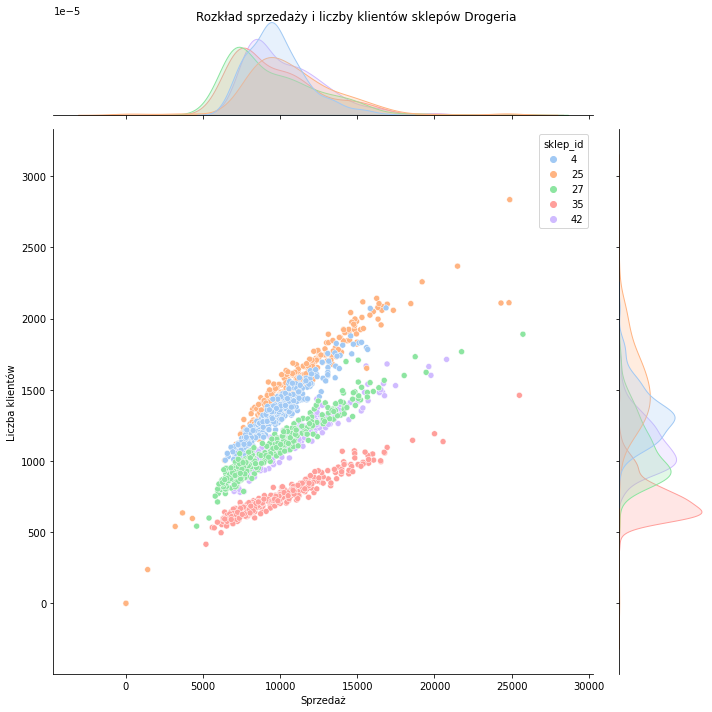

In [28]:
p4 = sns.jointplot(data = shops4, x="sprzedaz", y="liczba_klientow", hue="sklep_id", height = 10, palette = "pastel")
p4.fig.suptitle('Rozkład sprzedaży i liczby klientów sklepów Drogeria')
p4.set_axis_labels('Sprzedaż','Liczba klientów')
p4.fig.tight_layout()

plt.show()

# Sprzedaż vs święta

Przygotowanie danych dla wykresu 3. - zmergowanie danych dotyczących wystąpienia świąt, stworzenie tabeli przestawnej, sortowanie malejąco

In [29]:
shops5 = shops

holidays = ['Narodowe', 'Wielkanoc', 'Boże Narodzenie']
for holiday in holidays:
    shops5['czy_swieto'] = shops5['czy_swieto'].replace([holiday], 'Tak')

df5 = pd.pivot_table(shops5, index = ['sklep_id'], columns = ['czy_swieto'], values = ['sprzedaz'], aggfunc='sum')

df5.loc[:,'Suma'] = df5.sum(numeric_only = True, axis = 1) #kolumna z sumą ogółem
df5.sort_values(['Suma'], ascending = False, inplace=True)

df5

sprzedaz           Suma
czy_swieto      Nie   Tak         
sklep_id                          
42          3132357     0  3132357
25          3004443     0  3004443
4           2971989     0  2971989
35          2946316     0  2946316
27          2891329     0  2891329
24          2821886     0  2821886
7           2734048  3335  2737383
33          2512321     0  2512321
11          2465020     0  2465020
34          2457043     0  2457043
16          2362148     0  2362148
29          2312670     0  2312670
12          2309289     0  2309289
49          2250642     0  2250642
47          2202782     0  2202782
37          2113528     0  2113528
43          2075985     0  2075985
3           2072949     0  2072949
9           2054495     0  2054495
26          2051696     0  2051696
15          2043889     0  2043889
18          2019568     0  2019568
19          2009452     0  2009452
17          1925141     0  1925141
38          1811162     0  1811162
31          1806223     0  1806223
44          1725138     0  1725138
10          1713375     0  1713375
8           1689700     0  1689700
14          1686926     0  1686926
21          1683779     0  1683779
23          1671843     0  1671843
28          1589047     0  1589047
45          1583098     0  1583098
6           1548574  5173  1553747
30          1532860     0  1532860
40          1527073     0  1527073
2           1513743  2689  1516432
39          1487609     0  1487609
1           1433408     0  1433408
5           1401158  5307  1406465
36          1333512     0  1333512
50          1274687     0  1274687
48          1162829     0  1162829
20          1114306     0  1114306
41           824323     0   824323
46           798454     0   798454
13           738440     0   738440
22           647711     0   647711
32           602798     0   602798

Wykres 3. - wpływ sprzedaży w święta na sprzedaż sklepów *Drogeria* ogółem

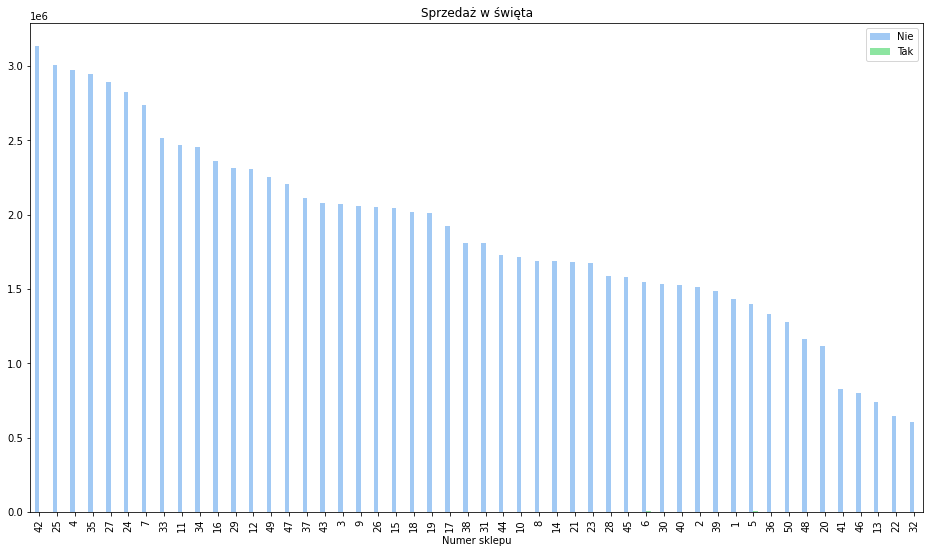

In [30]:
plt.rcParams["figure.figsize"] = (16,9)
y5 = ['sprzedaz']
df5.plot.bar(y=y5, color=color, legend=True) #stworzenie wykresu

L = plt.legend()
L.get_texts()[0].set_text('Nie')
L.get_texts()[1].set_text('Tak')
plt.title('Sprzedaż w święta')
plt.gca().set_xlabel('Numer sklepu')

plt.show()

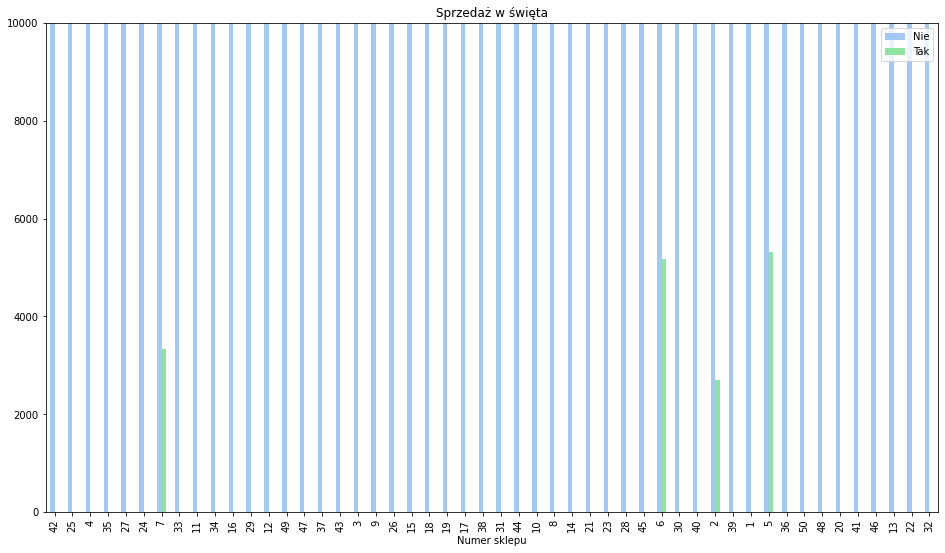

In [31]:
plt.rcParams["figure.figsize"] = (16,9)
y5 = ['sprzedaz']
df5.plot.bar(y=y5, color=color) #stworzenie wykresu
plt.ylim(0, 10000)

L = plt.legend()
L.get_texts()[0].set_text('Nie')
L.get_texts()[1].set_text('Tak')
plt.title('Sprzedaż w święta')
plt.gca().set_xlabel('Numer sklepu')


plt.show()

#Zależność między promocją a liczbą klientów w sklepie 


Przygotowanie danych do wykresu

In [32]:
shop = shops[(shops.czy_otwarty == 'Tak')]
shop

,sklep_id,dzien_tyg,data,sprzedaz,liczba_klientow,czy_otwarty,czy_promocja,czy_swieto,czy_swieto_szkolne,sklep_typ,sklep_asort,sklep_konkurencja
0,1,3,31.12.2021,2605,327,Tak,Nie,Nie,Tak,c,Podstawowy,1270
1,2,3,31.12.2021,2269,252,Tak,Nie,Nie,Tak,a,Podstawowy,570
2,3,3,31.12.2021,3804,408,Tak,Nie,Nie,Tak,a,Podstawowy,14130
3,4,3,31.12.2021,10152,1311,Tak,Nie,Nie,Tak,c,Rozszerzony,620
4,5,3,31.12.2021,1830,217,Tak,Nie,Nie,Tak,a,Podstawowy,29910
...,...,...,...,...,...,...,...,...,...,...,...,...
16907,46,4,02.01.2021,4185,630,Tak,Nie,Nie,Tak,c,Podstawowy,1200
16908,47,4,02.01.2021,6154,850,Tak,Nie,Nie,Tak,a,Rozszerzony,270
16909,48,4,02.01.2021,3945,448,Tak,Nie,Nie,Tak,a,Podstawowy,1060
16910,49,4,02.01.2021,5463,432,Tak,Nie,Nie,Tak,d,Rozszerzony,18010


Wykres 4. - rozkład ilości Klientów w sklepach Drogeria podczas promocji

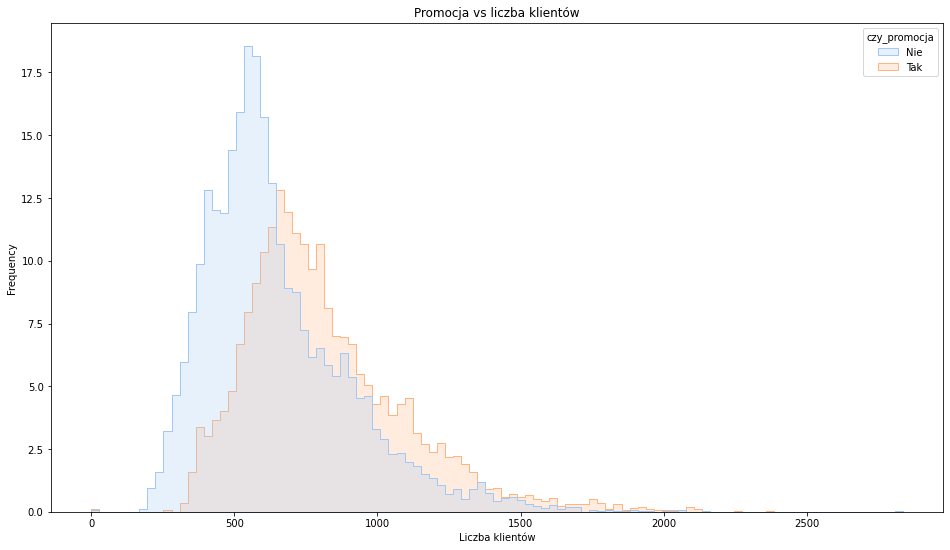

In [33]:
p6 = sns.histplot(shop, x='liczba_klientow', hue = 'czy_promocja', element="step", stat="frequency", common_norm=False, palette = 'pastel')
p6.set(xlabel='Liczba klientów', title='Promocja vs liczba klientów')
plt.show()

#Sprzedaż i Klienci w ciągu roku

 Przygotowanie danych do wykresu 5. - tabela przestawna, sprzedaż miesięczna oraz ilość Klientów w sklepie 42

In [34]:
shops1 = shops
shops1.data = pd.to_datetime(shops.data)
shops1.data = shops.data.dt.strftime('%Y-%m')

value6 =['sprzedaz', 'liczba_klientow']

shops6 = pd.pivot_table(shops1, index=['sklep_id'], values = value6, aggfunc='sum',columns=['data'])

sklep_42 = shops6.loc[42,:]
sklep_42

                 data   
liczba_klientow  2021-01     27708
                 2021-02     26303
                 2021-03     30012
                 2021-04     28338
                 2021-05     29107
                 2021-06     27928
                 2021-07     27732
                 2021-08     28983
                 2021-09     24465
                 2021-10     30051
                 2021-11     28368
                 2021-12     28344
sprzedaz         2021-01    250504
                 2021-02    240562
                 2021-03    286362
                 2021-04    272574
                 2021-05    267409
                 2021-06    267134
                 2021-07    261621
                 2021-08    260987
                 2021-09    223962
                 2021-10    265238
                 2021-11    258496
                 2021-12    277508
Name: 42, dtype: int64

**Wykres** 5. - sprzedaż i liczba klientów sklepu *Drogeria* nr 42

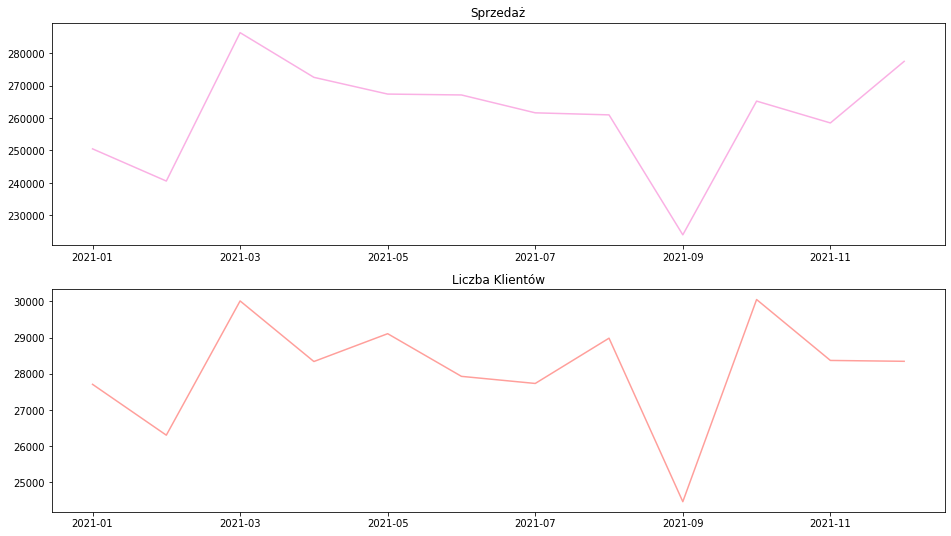

In [35]:
def plot_sales_and_customers(df):
    
    fig, (ax1, ax2) = plt.subplots(2, 1)
    df['sprzedaz'].plot(kind='line', ax=ax1, color = COLOR_6)
    ax1.set_title('Sprzedaż')
    ax1.set_xlabel('')

    df['liczba_klientow'].plot(kind='line', ax=ax2, color = COLOR_3)
    ax2.set_title('Liczba Klientów')
    ax2.set_xlabel('')

    plt.show()

plot_sales_and_customers(sklep_42)    

#Promocja vs sprzedaż

Przygotowanie danych do wykresu 6. - odfiltowanie wartości >0 oraz najbardziej dochodowego sklepu



In [36]:
shops3 = shops[(shops.sklep_id == 42 ) & (shops.czy_otwarty == 'Tak') ]

Wykres 6. - sprzedaż w ujęciu tygodniowym w zależności od wprowadzenia promocji

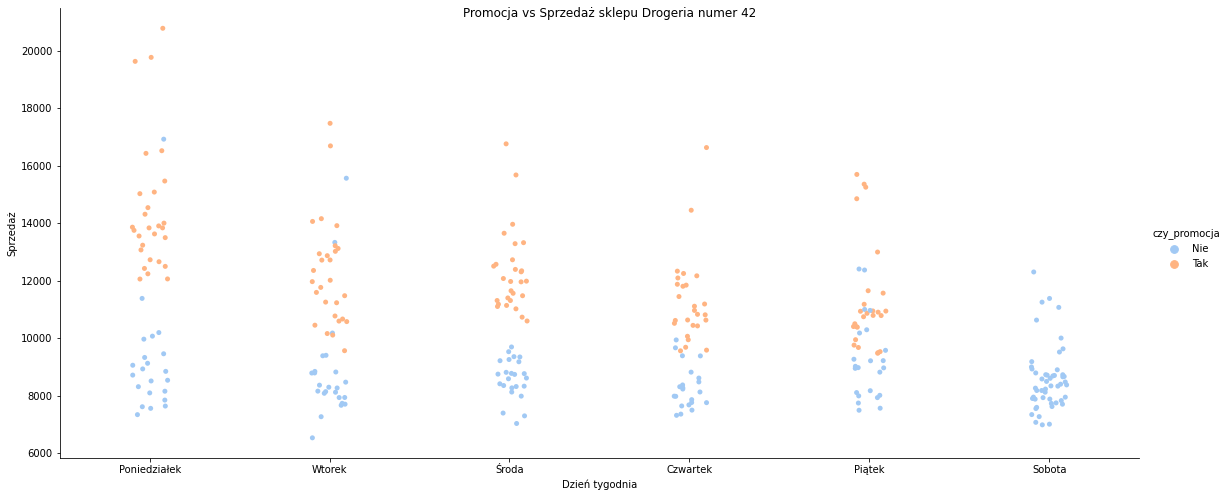

In [37]:
with sns.color_palette("pastel"):
  fig3 = sns.catplot(data = shops3, x = 'dzien_tyg', y = 'sprzedaz', hue = 'czy_promocja', height = 7, aspect =2.3)
  fig3.set_xticklabels(['Poniedziałek','Wtorek','Środa','Czwartek','Piątek','Sobota'])
  fig3.set_axis_labels('Dzień tygodnia','Sprzedaż')
  fig3.set_titles(template ='Wpływ promacji na sprzedaż wg dnia tygodnia')
  fig3.fig.suptitle('Promocja vs Sprzedaż sklepu Drogeria numer 42')
plt.show()


# Sprzedaż vs dzień tygodnia

Przygotowanie danych do wykresu 7. - odfiltrowanie wartości 0> oraz sklepu numer 42, stworzenie tabeli przestawnej sumującej sprzedaż w poszczególne dni tygodnia

In [38]:
shops7 = shops3

shops7 = shops[(shops.sklep_id == 42 ) & (shops.czy_otwarty == 'Tak') ]
df7 = pd.pivot_table(shops7, index = ['sklep_id'], columns = ['dzien_tyg'], values = ['sprzedaz'], aggfunc='mean')
df7.transpose()

sklep_id                      42
         dzien_tyg              
sprzedaz 1          12122.260000
         2          10679.019231
         3          10580.423077
         4           9924.958333
         5          10353.816327
         6           8568.980392

Wykres 7. - średnia sprzedaż dla sklepu *Drogeria* numer 42 wg dni tygodnia

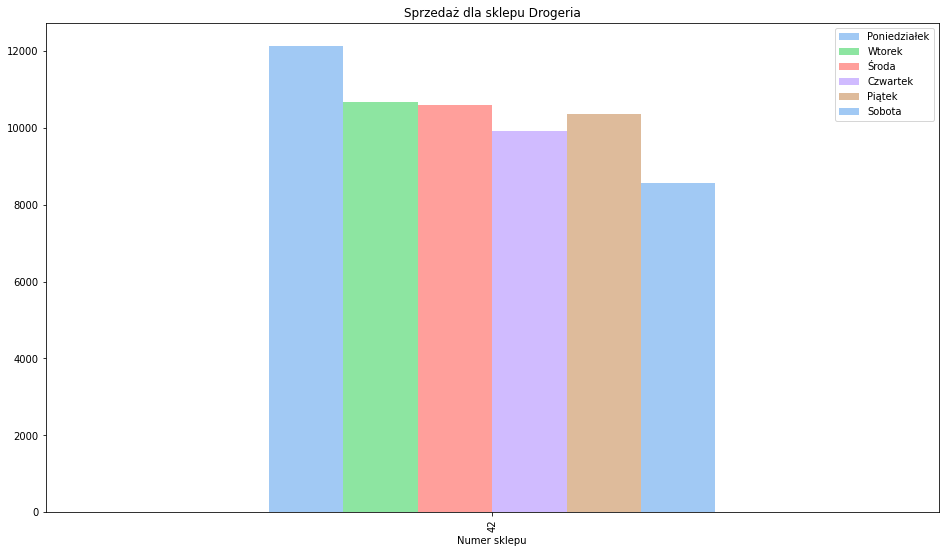

In [39]:
plt.rcParams["figure.figsize"] = (16,9)
fig7 = df7.plot.bar(y='sprzedaz', color = [COLOR_1, COLOR_2, COLOR_3, COLOR_4, COLOR_5])
plt.title('Sprzedaż dla sklepu Drogeria')
fig7.set_xlabel('Numer sklepu')
plt.ylabel  = ('Sprzedaż')

L = plt.legend()
L.get_texts()[0].set_text('Poniedziałek')
L.get_texts()[1].set_text('Wtorek')
L.get_texts()[2].set_text('Środa')
L.get_texts()[3].set_text('Czwartek')
L.get_texts()[4].set_text('Piątek')
L.get_texts()[5].set_text('Sobota')